In [1]:
import pandas as pd
from WindPy import w
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
df = pd.read_excel(u'D:/Data/industry/bank/银行业金融机构税后利润.xlsx')

In [4]:
df

,M0011790
2003-12-31,322.8
2004-12-31,1035.0
2005-12-31,2532.6
2006-12-31,3379.2
2007-12-31,4467.3
2008-12-31,5833.6
2009-12-31,6684.2
2010-12-31,8990.9
2011-12-31,12518.7
2012-12-31,15115.5


In [5]:
tdf = pd.read_excel(u'D:/Data/industry/bank/名义GDP.xlsx')

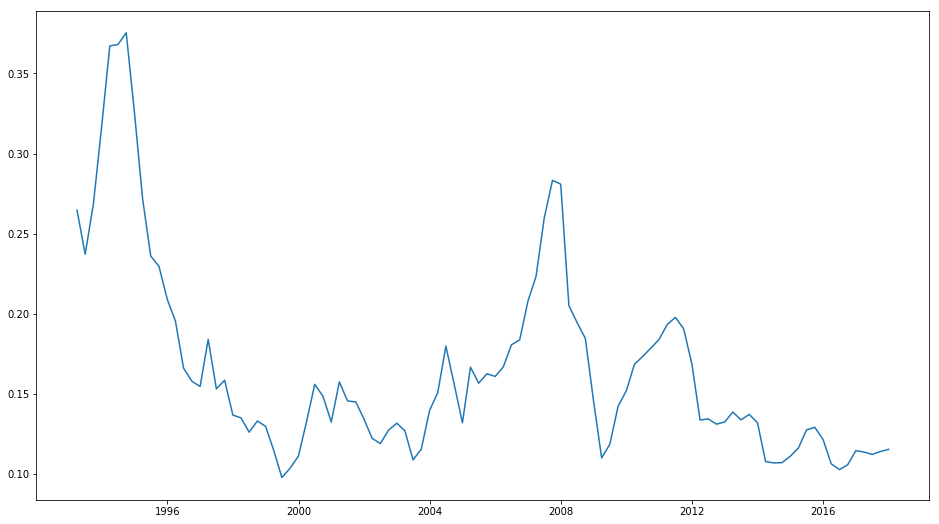

In [6]:
plt.figure(figsize=(16, 9))
plt.plot(tdf['M5567879'].pct_change(4))

In [7]:
tdf = tdf.rolling(window=4).sum()

In [8]:
df = df.merge(tdf, how='outer', left_index=True, right_index=True)

In [9]:
df[df.index >= '2003-01-01'].dropna()

,M0011790,M5567879
2003-12-31,322.8,57754.4
2004-12-31,1035.0,66649.0
2005-12-31,2532.6,77427.8
2006-12-31,3379.2,91759.6
2007-12-31,4467.3,115810.7
2008-12-31,5833.6,136805.7
2009-12-31,6684.2,154747.9
2010-12-31,8990.9,182038.0
2011-12-31,12518.7,216098.6
2012-12-31,15115.5,244822.0


In [10]:
df = df.dropna()

In [11]:
r = df['M0011790'] / df['M5567879']

In [12]:
r

2003-12-31    0.005589
2004-12-31    0.015529
2005-12-31    0.032709
2006-12-31    0.036827
2007-12-31    0.038574
2008-12-31    0.042641
2009-12-31    0.043194
2010-12-31    0.049390
2011-12-31    0.057931
2012-12-31    0.061741
2013-12-31    0.062760
2014-12-31    0.062577
2015-12-31    0.057022
2016-12-31    0.054080
dtype: float64

<Container object of 14 artists>

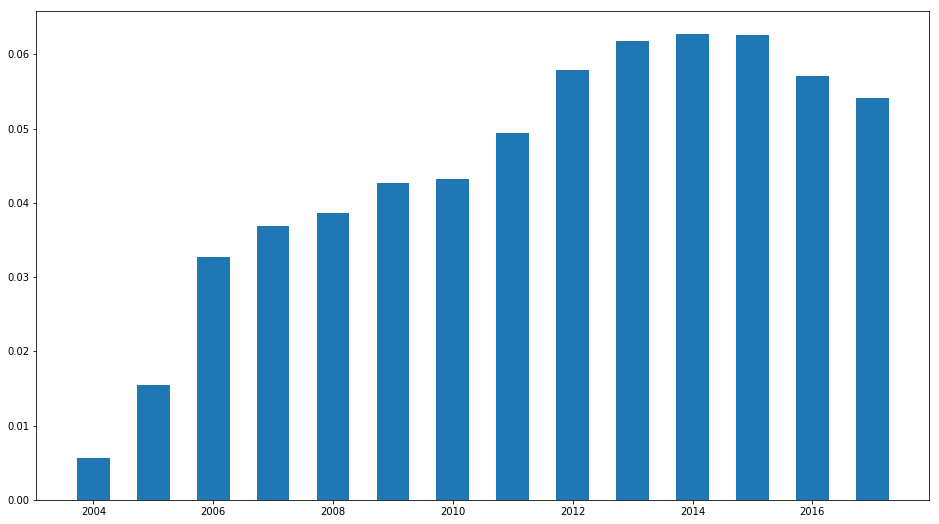

In [13]:
plt.figure(figsize=(16, 9))
# plt.plot(r)
plt.bar(r.index, r.values, width=200)

In [14]:
r_ch = r.pct_change()

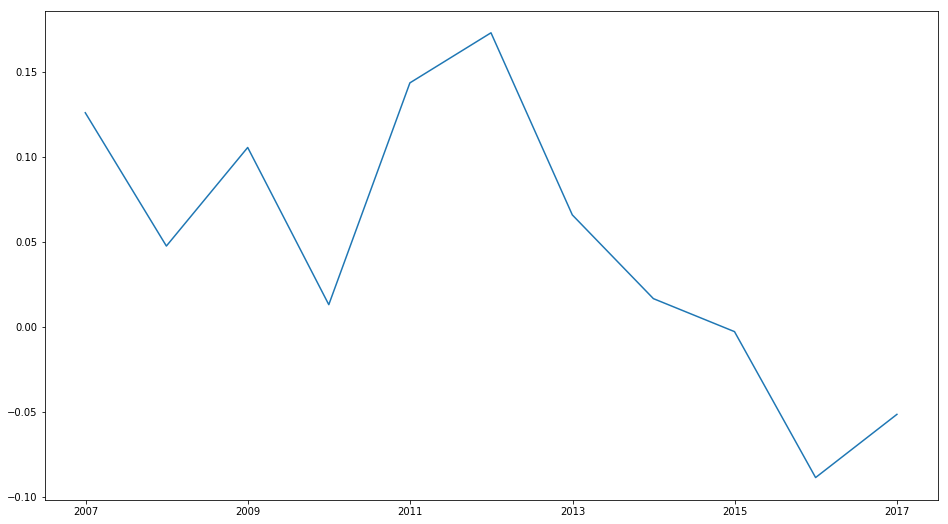

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(r_ch[r_ch.index >= '2006-01-01'])

In [35]:
raw_data = w.wsd(['CI005021.WI', '881001.WI'], 'close', '2004-12-31', '2016-12-31')

In [36]:
sdf = pd.DataFrame(np.array(raw_data.Data).T, index=raw_data.Times, columns=raw_data.Codes)

In [37]:
sdf.index = pd.to_datetime(sdf.index)

In [38]:
rdf = sdf.resample('A').last().pct_change()

In [39]:
rdf

,CI005021.WI,881001.WI
2004-12-31,NaN,NaN
2005-12-31,0.144940,-0.115212
2006-12-31,1.699417,1.118968
2007-12-31,0.935812,1.662138
2008-12-31,-0.653635,-0.629213
2009-12-31,1.085803,1.054656
2010-12-31,-0.280525,-0.068787
2011-12-31,-0.035726,-0.224183
2012-12-31,0.190430,0.046796
2013-12-31,-0.048378,0.054406


-0.0325551667741
0.274725447366


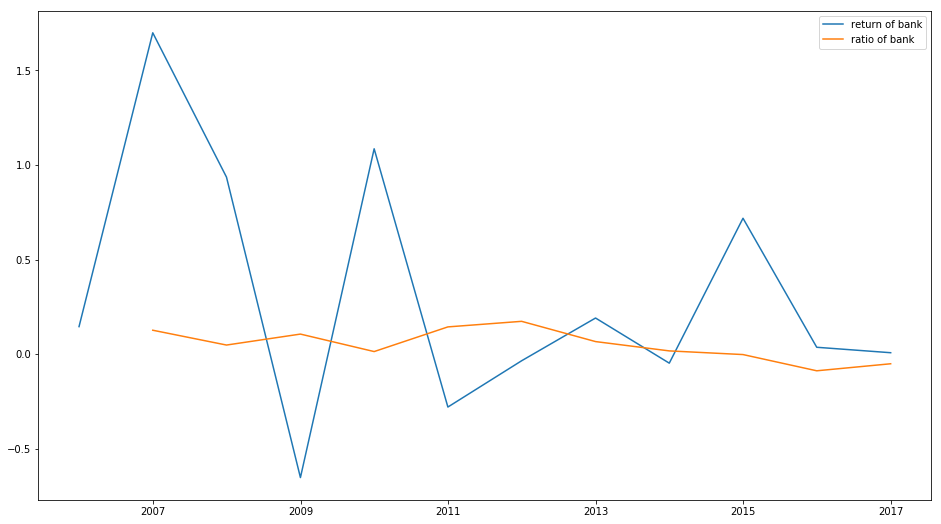

In [46]:
plt.figure(figsize=(16, 9))
# plt.plot(rdf['CI005021.WI'] - rdf['881001.WI'], label='return of bank')
plt.plot(rdf['CI005021.WI'], label='return of bank')
plt.plot(r_ch[r_ch.index >= '2006-01-01'], label='ratio of bank')
print r_ch[r_ch.index >= '2006-01-01'].corr(rdf['CI005021.WI'])
print r_ch[r_ch.index >= '2006-01-01'].corr(rdf['CI005021.WI'] - rdf['881001.WI'])
plt.legend()